## Ames Housing data

### Contents:
- [1. BACKGROUND](#BACKGROUND)
- [2. PROBLEM STATEMENT](#PROBLEM_STATEMENT)
- [3. IMPORTING OF RELEVANT LIBRARIES](#IMPORTING_OF_RELEVANT_LIBRARIES)
- [4. GETTING THE DATA FROM CSV FORMAT AND INITIAL EDA](#GETTING_THE_DATA)
- [5.CLEANING DATASET](#CLEANING_DATASET)
    - [A. REMOVING NULL VALUES](#REMOVING_NULL_VALUES)
    - [B. CLEANING DATASET - CHANGING ORDINAL VALUES TO INTEGER/FLOAT](CLEANING_DATASET_-_CHANGING_ORDINAL)
    - [C. SAVING COPY OF TRAIN DATASET IN CSV FORMAT](#SAVING_COPY_OF_TRAIN_DATASET)
    - [D. CLEANING OF TEST DATA](#CLEANING_OF_TEST_DATA)
    - [E. SAVING COPY OF TEST DATASET IN CSV FORMAT](#SAVING_COPY_OF_TEST_DATASET)
    
 ........ Continued in Notebook 2
 

# 1. BACKGROUND

#### The Ames Housing Dataset is an exceptionally detailed and robust dataset with over 70 columns of different features relating to houses. Ames is a small city in the state of Iowa in the United States. It’s home to Iowa State University, which is the largest university in the state.The dataset examines features of houses sold in Ames during the 2006–10 timeframe. The goal is to use the training data to predict the sale prices of the houses in the testing data.


## 2. PROBLEM STATEMENT

#### To develop a Linear Regression model for the Prediction of saleprice of property using data available from Ames Iowa. 

#### Baseline for Regression: The baseline score for regression can be computed by using the average Y value (sale Price) as predicted Y. 

## 3. IMPORTING OF RELEVANT LIBRARIES

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [115]:
# Setting options to view entire dataset

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## 4. GETTING THE DATA FROM CSV FORMAT AND INITIAL EDA

#### The data is got from the 'train.csv' and 'test csv' files and checked for shape, datatypes and column headings

In [116]:
# getting data from csv files - training data (train.csv)

df_train = pd.read_csv('../datasets/train.csv')
df_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [117]:
# getting data from csv files - test data (test.csv)

df_test = pd.read_csv('../datasets/test.csv')
df_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [118]:
df_train.shape

(2051, 81)

In [119]:
df_test.shape

(879, 80)

In [120]:
df_train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

## 5.CLEANING DATASET - 
### A. REMOVING NULL VALUES : 'df_train'

##### Various preparation steps were done to ensure that the dataset was complete and could be used to design the model. These include checking for null values to replace them with effective values, checking datatypes, converting ordinal and nominal values to equivalents in integer or float form to allow for model preparation.

##### Training dataset from train.csv file : df_train
##### Cleaned dataset : df_train_alt
##### Final Training dataset - df_train_dummies

##### Testing dataset  from test.csv file: df_test
##### Cleaned dataset : df_test_alt
##### Final Testing dataset: df_test_dummies

In [121]:
#checking for null values in df_train

df_train.isnull().sum()

Id                    0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage        330
Lot Area              0
Street                0
Alley              1911
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type         22
Mas Vnr Area         22
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            55
Bsmt Cond            55
Bsmt Exposure        58
BsmtFin Type 1       55
BsmtFin SF 1          1
BsmtFin Type 2       56
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC      

### Looking at specific columns in training dataset - df_train
##### i. Starting with Pool QC (highest number of null values)

In [122]:
# df_train: checking more details of Pool QC

df_train['Pool QC'].value_counts()

Gd    4
TA    2
Fa    2
Ex    1
Name: Pool QC, dtype: int64

##### Dropping  column 'Pool QC' since only 9 values available in column

In [123]:
# df_train: dropping column 'Pool QC' as only 9 values available
# df_train_alt created and proceed with cleaning

df_train_alt=df_train.drop(axis=1,columns='Pool QC')


In [124]:
# df_train_alt: Checking datatypes

df_train_alt.dtypes

Id                   int64
PID                  int64
MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1       float64
BsmtFin Type 2      object
B

In [125]:
# df_train_alt: Summary statistics

df_train_alt.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,2050.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2049.000000,2049.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,1937.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,47.959024,567.728293,1057.987805,1164.488055,329.329108,5.512921,1499.330083,0.427526,0.063446,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1978.707796,1.776585,473.671707,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,165.000901,444.954786,449.410704,396.446923,425.671046,51.068870,500.447829,0.522673,0.251705,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,25.441094,0.764537,215.934561,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.500000,994.500000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,0.000000,811.000000,1318.750000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


##### ii. df_train_alt: Replacing null values
#### Column 'Lot Frontage' has a mean 69.06 and median 68 being values close to each other. 
#### This indicates that the distribution is almost Normal and hence the mean value is used for the null values
#### 330 null values in 'Lot Frontage' were filled with mean value 69.055

In [126]:
# df_train_alt: Replacing null values in 'Lot Frontage' with mean value

df_train_alt['Lot Frontage']= df_train_alt['Lot Frontage'].fillna(df_train_alt['Lot Frontage'].mean())
df_train_alt['Lot Frontage'].isnull().sum()

0

#### iii. df_train_alt: Referring to Data Dictionary to resolve null values in column data types
#### 'Alley' NaN values replacing by str 'NA'. This is later converted to integer when all strings are replaced with integers.
#### 'Mas Vnr Type' and 'Mas Vnr Area' both have 22 null values in same rows. '
    - 'Max Vnr Type' replacing 22 null values with None. 
    - 'Max Vnr Area' replacing 22 null values with 0

In [127]:
# df_train_alt: 'Alley' NaN values replacing by str 'NA'. 
# to be replaced with integer at later stage of data cleaning

df_train_alt['Alley'].fillna('No', inplace=True)
df_train_alt['Alley'].isnull().sum()


0

In [128]:
# df_train_alt: 'Mas Vnr Type' and 'Mas Vnr Area' both have 22 null values in same rows

cols = ['Mas Vnr Type','Mas Vnr Area']
df_train_alt[df_train_alt[cols].isnull().all(axis=1)]


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
22,2393,528142010,60,RL,103.0000,12867,Pave,No,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2005,2006,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Ex,TA,Av,Unf,0.0,Unf,0.0,1209.0,1209.0,GasA,Ex,Y,SBrkr,1209,1044,0,2253,0.0,0.0,2,1,3,1,Ex,8,Typ,1,Gd,Attchd,2005.0,Fin,2.0,575.0,TA,TA,Y,243,142,0,0,0,0,NaN,NaN,0,7,2006,New,344133
41,2383,528110050,20,RL,107.0000,13891,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386.0,Unf,0.0,690.0,2076.0,GasA,Ex,Y,SBrkr,2076,0,0,2076,1.0,0.0,2,1,2,1,Ex,7,Typ,1,Gd,Attchd,2006.0,Fin,3.0,850.0,TA,TA,Y,216,229,0,0,0,0,NaN,NaN,0,9,2006,New,465000
86,539,531371050,20,RL,67.0000,10083,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833.0,Unf,0.0,343.0,1176.0,GasA,Ex,Y,SBrkr,1200,0,0,1200,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,2003.0,RFn,2.0,555.0,TA,TA,Y,0,41,0,0,0,0,NaN,NaN,0,8,2009,WD,184900
212,518,528458020,20,FV,90.0000,7993,Pave,No,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2008,2009,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,Unf,0.0,Unf,0.0,1436.0,1436.0,GasA,Ex,Y,SBrkr,1436,0,0,1436,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,2008.0,Fin,2.0,529.0,TA,TA,Y,0,121,0,0,0,0,NaN,NaN,0,10,2009,New,225000
276,2824,908130020,20,RL,75.0000,8050,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,TA,TA,PConc,Gd,TA,Av,GLQ,475.0,ALQ,297.0,142.0,914.0,GasA,Ex,Y,SBrkr,914,0,0,914,1.0,0.0,1,0,2,1,Gd,4,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,32,0,0,0,0,0,NaN,NaN,0,4,2006,WD,117250
338,1800,528458150,60,FV,112.0000,12217,Pave,No,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,8,5,2007,2007,Hip,CompShg,WdShing,Wd Shng,NaN,NaN,Gd,TA,PConc,Ex,TA,Av,GLQ,745.0,Unf,0.0,210.0,955.0,GasA,Ex,Y,SBrkr,955,925,0,1880,1.0,0.0,2,1,3,1,Ex,8,Typ,1,Gd,Attchd,2007.0,Fin,3.0,880.0,TA,TA,Y,168,127,0,0,0,0,NaN,NaN,0,12,2007,New,310013
431,1455,907251090,60,RL,75.0000,9473,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,804.0,Unf,0.0,324.0,1128.0,GasA,Ex,Y,SBrkr,1128,903,0,2031,1.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2002.0,RFn,2.0,577.0,TA,TA,Y,0,211,0,0,0,0,NaN,NaN,0,3,2008,WD,237000
451,1120,528439010,20,RL,87.0000,10037,Pave,No,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Feedr,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,GLQ,666.0,Unf,0.0,794.0,1460.0,GasA,Ex,Y,SBrkr,1460,0,0,1460,0.0,0.0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2006.0,Fin,2.0,480.0,TA,TA,Y,0,20,0,0,0,0,NaN,NaN,0,8,2008,WD,247000
591,1841,533208040,120,FV,35.0000,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,1106.0,Unf,0.0,135.0,1241.0,GasA,Ex,Y,SBrkr,1241,0,0,1241,1.0,0.0,1,1,1,1,Gd,4,Typ,0,NaN,Attchd,2007.0,Fin,2.0,569.0,TA,TA,Y,0,116,0,0,0,

In [129]:
# df_train_alt:
# 'Max Vnr Type' replacing 22 null values with None
# 'Max Vnr Area' replacing 22 null values with 0

df_train_alt['Mas Vnr Type'].fillna('None', inplace=True)
df_train_alt['Mas Vnr Area'].fillna(0, inplace=True)
df_train_alt[cols].isnull().sum()

Mas Vnr Type    0
Mas Vnr Area    0
dtype: int64

##### iv. df_train_alt: Looking at Subset of Garage items

In [130]:
# df_train_alt: subset of Garage items

garage = ['Year Built','Garage Type', 'Garage Yr Blt','Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual','Garage Cond']
df_train_alt[garage]


,Year Built,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
0,1976,Attchd,1976.0,RFn,2.0,475.0,TA,TA
1,1996,Attchd,1997.0,RFn,2.0,559.0,TA,TA
2,1953,Detchd,1953.0,Unf,1.0,246.0,TA,TA
3,2006,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA
4,1900,Detchd,1957.0,Unf,2.0,484.0,TA,TA
5,1966,Attchd,1966.0,Fin,2.0,578.0,TA,TA
6,2005,Basment,2005.0,Fin,2.0,525.0,TA,TA
7,1959,Attchd,1959.0,RFn,2.0,531.0,TA,TA
8,1952,Detchd,1952.0,Unf,1.0,420.0,TA,TA
9,1969,Attchd,1969.0,Unf,2.0,504.0,TA,TA


In [131]:
df_train_alt[garage].isnull().sum()

Year Built         0
Garage Type      113
Garage Yr Blt    114
Garage Finish    114
Garage Cars        1
Garage Area        1
Garage Qual      114
Garage Cond      114
dtype: int64

In [132]:
#identify the single row with error in 'Garage Type'

df_train_alt[(df_train_alt['Garage Type'].notnull()) & (df_train_alt['Garage Yr Blt'].isnull())]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1712,2237,910201180,70,RM,50.0,9060,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,MnPrv,NaN,0,3,2007,WD,150909


#### v. df_train_alt: row 1712 has error in 'Garage Type' to change to null value - 
#### The house does not have garage, but value 'Detchd' entered in  'Garage type'

In [133]:
# row 1712 has error in 'Garage Type' to change to null value

df_train_alt.loc[df_train_alt[(df_train_alt['Garage Type'].notnull()) & (df_train_alt['Garage Yr Blt'].isnull())].index,'Garage Type'] = 0
df_train_alt.loc[df_train_alt[(df_train_alt['Garage Type'].notnull()) & (df_train_alt['Garage Yr Blt'].isnull())].index,'Garage Cars'] = 0
df_train_alt.loc[df_train_alt[(df_train_alt['Garage Type'].notnull()) & (df_train_alt['Garage Yr Blt'].isnull())].index,'Garage Area'] = 0


 #### df_train_alt: Confirmed 113 rows of null in subset 'garage' do not have a garage and hence replacing 'Garage Yr Blt' with integer 0.
 #### Other values will be converted to integers by ranking or converting to binary details in processes that follow

In [134]:
# Replacing null values with 0

df_train_alt['Garage Yr Blt'].fillna(0, inplace=True)
df_train_alt['Garage Type'].fillna(0, inplace=True)

#### vi. df_train_alt: Looking at subset 'basement' topics

In [135]:
basement = ['Bsmt Qual','Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1','BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF']
df_train_alt[basement].isnull().sum()

Bsmt Qual         55
Bsmt Cond         55
Bsmt Exposure     58
BsmtFin Type 1    55
BsmtFin SF 1       1
BsmtFin Type 2    56
BsmtFin SF 2       1
Bsmt Unf SF        1
Total Bsmt SF      1
dtype: int64

#### df_train_alt: Checking for 3 additional rows in 'Bsmt Exposure' that appear to have an error

In [136]:
df_train_alt[df_train_alt[(basement)].isnull().values]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
12,807,906226060,70,RL,120.0000,26400,Pave,No,Reg,Bnk,AllPub,FR2,Gtl,SawyerW,Feedr,Norm,1Fam,2Story,5,7,1880,2007,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Ex,Y,SBrkr,1288,728,0,2016,0.0,0.0,1,0,4,1,TA,7,Mod,1,TA,Attchd,1900.0,Unf,2.0,576.0,TA,TA,P,0,0,0,0,0,0,NaN,NaN,0,6,2009,WD,131000
12,807,906226060,70,RL,120.0000,26400,Pave,No,Reg,Bnk,AllPub,FR2,Gtl,SawyerW,Feedr,Norm,1Fam,2Story,5,7,1880,2007,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Ex,Y,SBrkr,1288,728,0,2016,0.0,0.0,1,0,4,1,TA,7,Mod,1,TA,Attchd,1900.0,Unf,2.0,576.0,TA,TA,P,0,0,0,0,0,0,NaN,NaN,0,6,2009,WD,131000
12,807,906226060,70,RL,120.0000,26400,Pave,No,Reg,Bnk,AllPub,FR2,Gtl,SawyerW,Feedr,Norm,1Fam,2Story,5,7,1880,2007,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Ex,Y,SBrkr,1288,728,0,2016,0.0,0.0,1,0,4,1,TA,7,Mod,1,TA,Attchd,1900.0,Unf,2.0,576.0,TA,TA,P,0,0,0,0,0,0,NaN,NaN,0,6,2009,WD,131000
12,807,906226060,70,RL,120.0000,26400,Pave,No,Reg,Bnk,AllPub,FR2,Gtl,SawyerW,Feedr,Norm,1Fam,2Story,5,7,1880,2007,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Ex,Y,SBrkr,1288,728,0,2016,0.0,0.0,1,0,4,1,TA,7,Mod,1,TA,Attchd,1900.0,Unf,2.0,576.0,TA,TA,P,0,0,0,0,0,0,NaN,NaN,0,6,2009,WD,131000
12,807,906226060,70,RL,120.0000,26400,Pave,No,Reg,Bnk,AllPub,FR2,Gtl,SawyerW,Feedr,Norm,1Fam,2Story,5,7,1880,2007,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Ex,Y,SBrkr,1288,728,0,2016,0.0,0.0,1,0,4,1,TA,7,Mod,1,TA,Attchd,1900.0,Unf,2.0,576.0,TA,TA,P,0,0,0,0,0,0,NaN,NaN,0,6,2009,WD,131000
93,811,906226100,90,RL,64.0000,7018,Pave,No,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,1Story,5,5,1979,1979,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,1535,0,0,1535,0.0,0.0,2,0,4,2,TA,8,Typ,0,NaN,Attchd,1979.0,Unf,2.0,400.0,TA,TA,Y,0,0,0,0,0,0,GdPrv,NaN,0,6,2009,WD,118858
93,811,906226100,90,RL,64.0000,7018,Pave,No,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,1Story,5,5,1979,1979,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,1535,0,0,1535,0.0,0.0,2,0,4,2,TA,8,Typ,0,NaN,Attchd,1979.0,Unf,2.0,400.0,TA,TA,Y,0,0,0,0,0,0,GdPrv,NaN,0,6,2009,WD,118858
93,811,906226100,90,RL,64.0000,7018,Pave,No,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,1Story,5,5,1979,1979,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,1535,0,0,1535,0.0,0.0,2,0,4,2,TA,8,Typ,0,NaN,Attchd,1979.0,Unf,2.0,400.0,TA,TA,Y,0,0,0,0,0,0,GdPrv,NaN,0,6,2009,WD,118858
93,811,906226100,90,RL,64.0000,7018,Pave,No,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,1Story,5,5,1979,1979,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,1535,0,0,1535,0.0,0.0,2,0,4,2,TA,8,Typ,0,NaN,Attchd,1979.0,Unf,2.0,400.0,TA,TA,Y,0,0,0,0,0,0,GdPrv,NaN,0,6,2009,WD,118858
93,811,906226100,90,RL,64

In [137]:
# to identify 'Bsmt Exposure' rows that have any errors

df_train_alt[basement][(df_train_alt['Bsmt Exposure'].isnull())]


,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF
12,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
93,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
114,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
146,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
183,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
240,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
249,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
256,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
390,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
437,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0


####  The rows with similar values of 'Bsmt Qual', 'Bsmt Cond' and ''BsmtFin Type 1' have 'No' for 'Bsmt Exposure'
####  So replacing the same in rows where  'Basement Exposure' is 'NaN' with also 'No' as it appears there is no basement.
#### Text values to be replaced with integers at later stage of data cleaning


In [138]:
df_bsmt_null = df_train_alt[basement][(df_train_alt['Bsmt Exposure'].isnull()) &(df_train_alt['Bsmt Qual'] == 'Gd') & (df_train_alt['Bsmt Cond']== 'TA') & (df_train_alt['BsmtFin Type 1']== 'Unf') ].sort_values('Bsmt Exposure')
df_bsmt_null['Bsmt Exposure'] = 'No'

In [139]:
df_train_alt[basement].isnull().sum()

Bsmt Qual         55
Bsmt Cond         55
Bsmt Exposure     58
BsmtFin Type 1    55
BsmtFin SF 1       1
BsmtFin Type 2    56
BsmtFin SF 2       1
Bsmt Unf SF        1
Total Bsmt SF      1
dtype: int64

#### df_train_alt: checking for other errors in subset basement - 4 columns with 1 null value. Hence replacing the null value in 'Bsmt Fin Type 2' with mode value of 'Unf'

In [140]:
BsmtFinType2=df_train_alt[basement][(df_train_alt['BsmtFin Type 1'].notnull()) & (df_train_alt['BsmtFin Type 2'].isnull())]
BsmtFinType2['BsmtFin Type 2'].fillna('Unf')       # filling single null value with mode value of column

1147    Unf
Name: BsmtFin Type 2, dtype: object

In [141]:
# filling othe null values with zero

df_train_alt[basement]['BsmtFin SF 1'].fillna(0, inplace=True)
df_train_alt[basement]['BsmtFin SF 2'].fillna(0, inplace=True)
df_train_alt[basement]['Bsmt Unf SF'].fillna(0, inplace=True)
df_train_alt[basement]['Total Bsmt SF'].fillna(0, inplace=True)


C:\Users\bhavn\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [142]:
df_train_alt.isnull().sum()

Id                    0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage          0
Lot Area              0
Street                0
Alley                 0
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type          0
Mas Vnr Area          0
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            55
Bsmt Cond            55
Bsmt Exposure        58
BsmtFin Type 1       55
BsmtFin SF 1          1
BsmtFin Type 2       56
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC      

In [143]:
df_train_alt.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,69.0552,13517,Pave,No,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0000,11492,Pave,No,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0000,7922,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0000,9802,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0000,14235,Pave,No,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,0,3,2010,WD,138500


#### vii. Plotting heatmap using Seaborn to get a feel of the numeric data reviewed so far

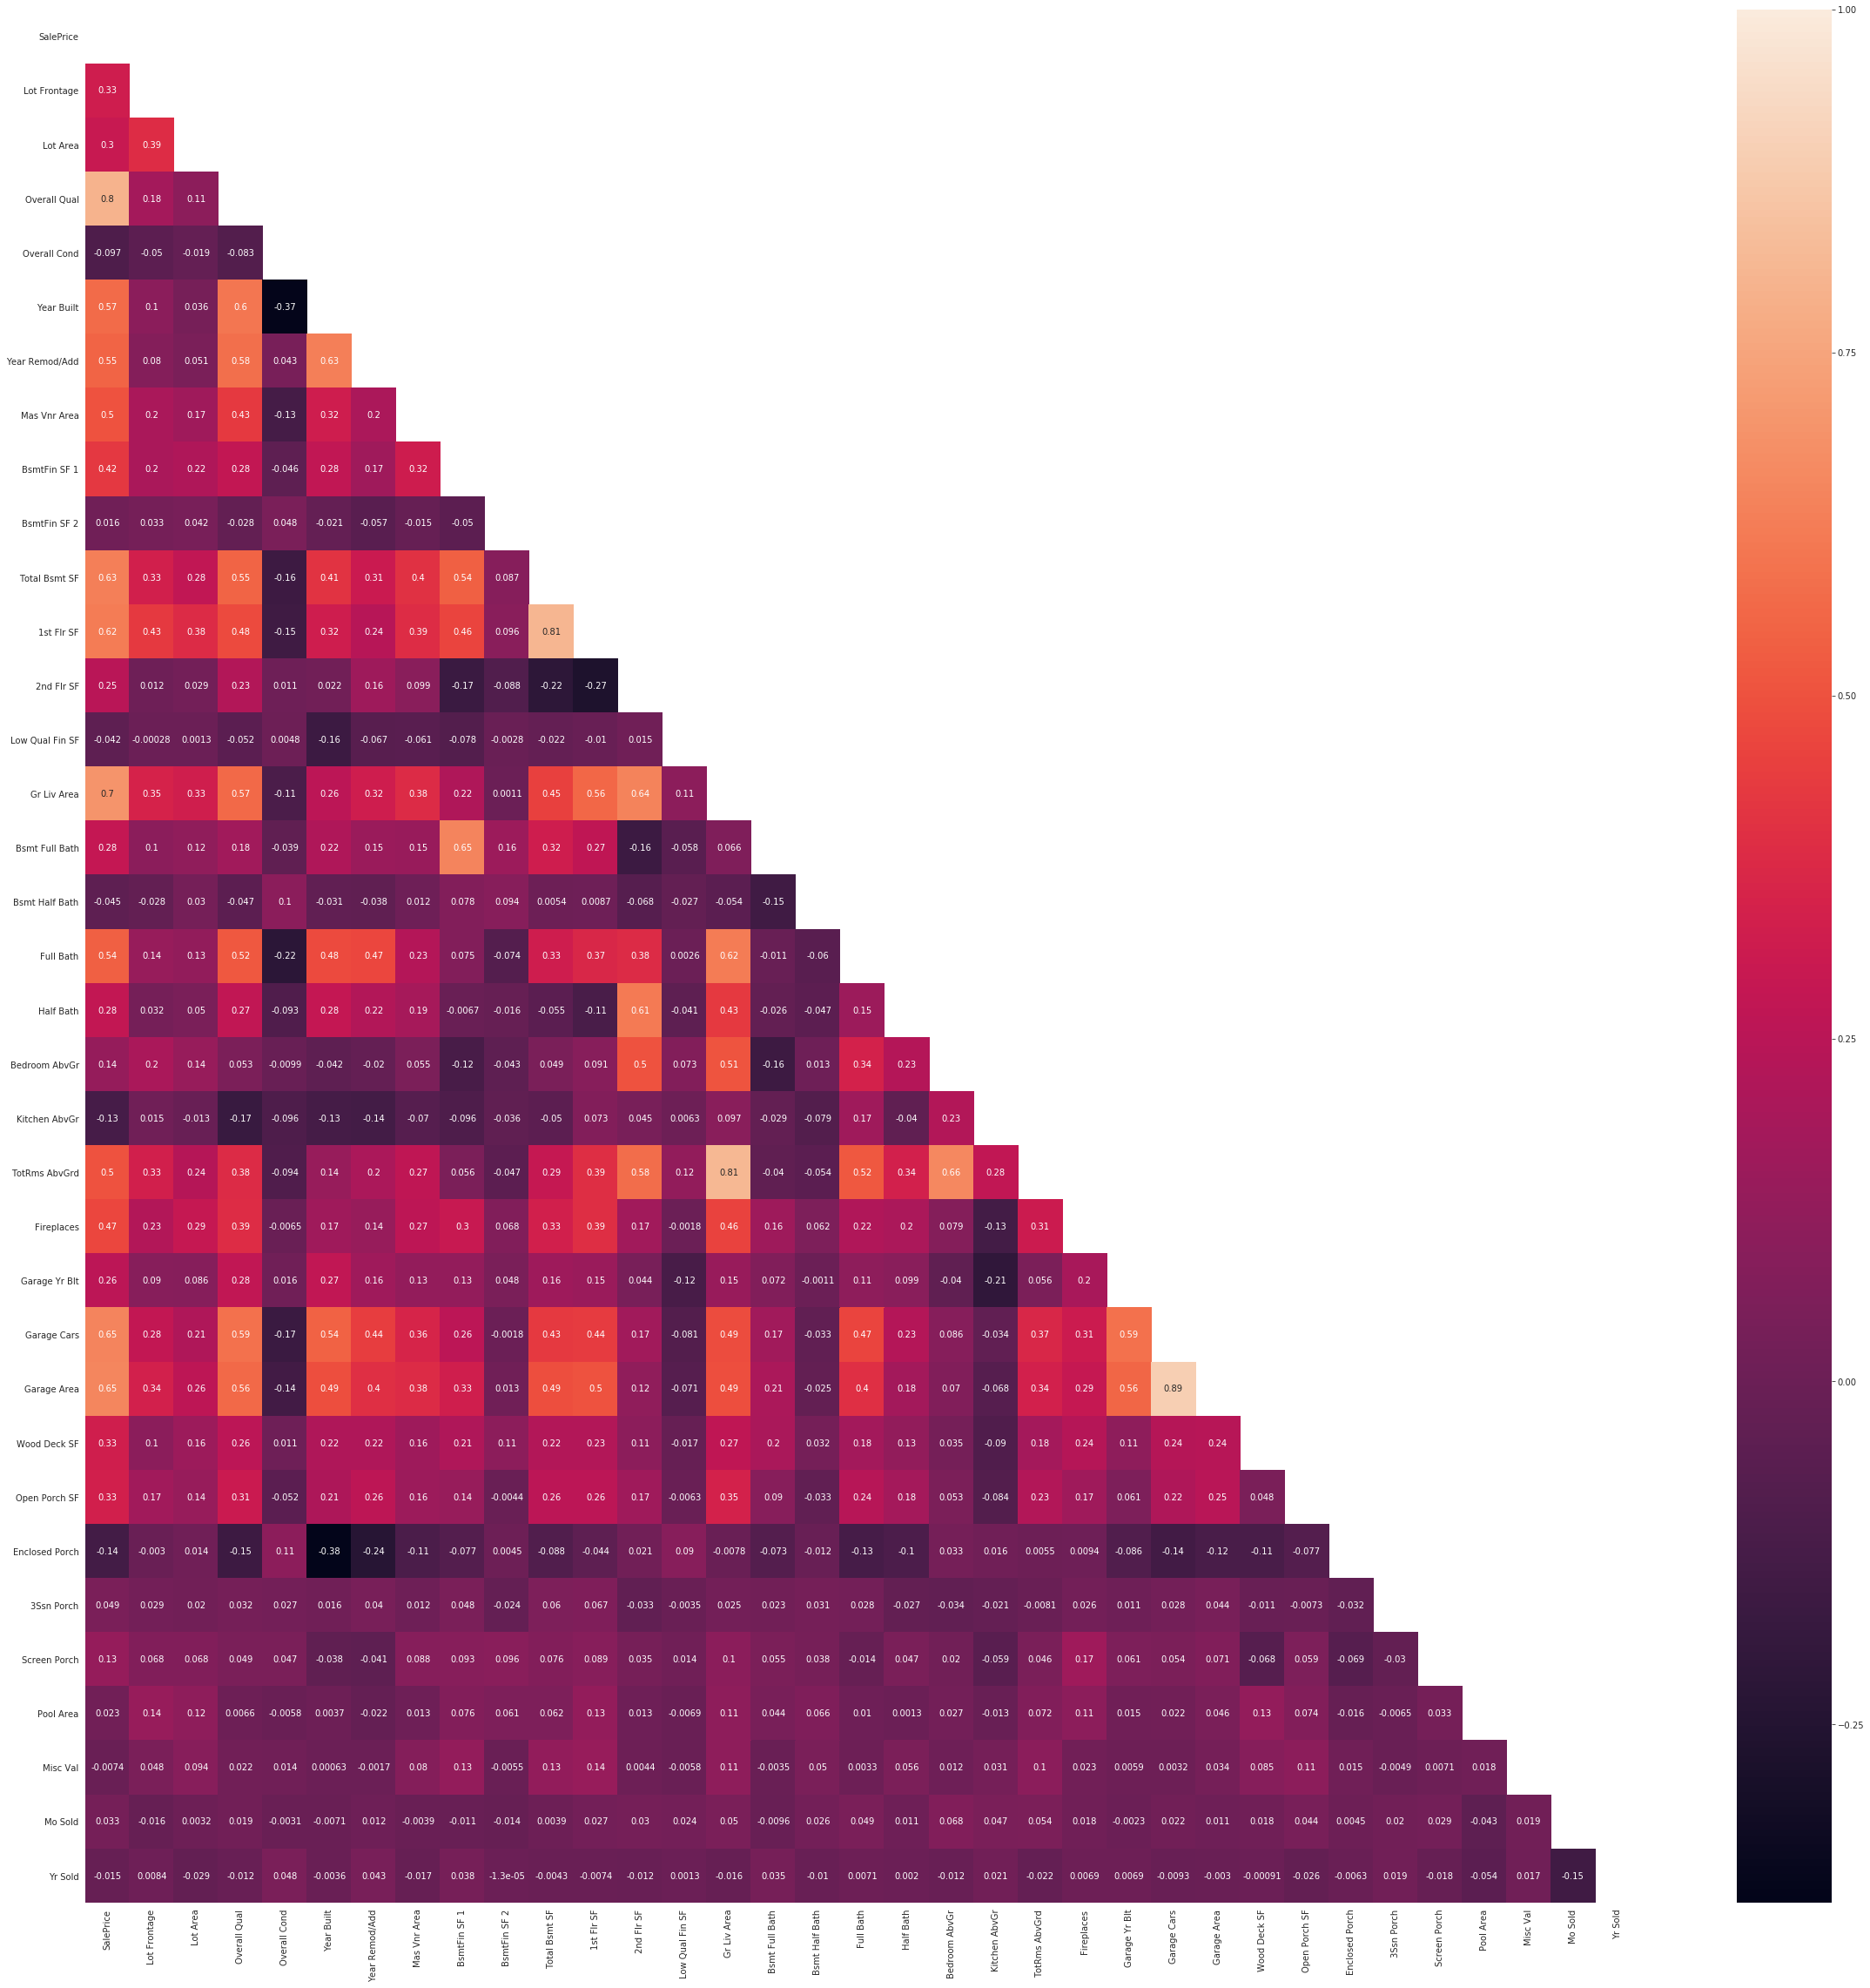

In [144]:
plt.figure(figsize=(40,40))

plot_numeric_data =['SalePrice','Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond',
              'Year Built','Year Remod/Add', 'Mas Vnr Area','BsmtFin SF 1', 'BsmtFin SF 2',
              'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
              'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
              'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars',
              'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
              'Screen Porch', 'Pool Area', 'Fence', 'Misc Val', 'Mo Sold', 'Yr Sold']

mask = np.zeros_like(df_train_alt[plot_numeric_data].corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns.heatmap(df_train_alt[plot_numeric_data].corr(), mask=mask, annot=True)

### Observations from heatmap (numerical data):
#### The following features show a good positive correlation with Sale Price: Garage Cars, Garage Area, TotRms AbvGrd, Fireplaces, Full Bath, Gr Liv Area, Total Bsmt SF, 1st Flr SF, Overall Qual, 
#### The following features show a good negative correlation with Sale Price: Lot Area, Enclosed porch, Kitchen AbvGrd


## B. CLEANING DATASET - CHANGING ORDINAL VALUES TO INTEGER/FLOAT : 'df_train_alt'
#### There are features that are ordinal in nature and hence the categorical data in these columns can be converted to a ranking integer. This conversion will aid in their inclusion in the design of the model.

#### The features include 'Lot Shape','Utilities','Land Slope','Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating QC', 'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Finish', 'Garage Qual','Garage Cond', 'Paved Drive' and 'Fence'



In [145]:
# changing ordinals ratings to rankings - 'Lot Shape'

mapping = {'IR3': 1,'IR2': 2,'IR1': 3,'Reg': 4}
df_train_alt['Lot Shape']= df_train_alt['Lot Shape'].apply(lambda x : mapping[x])


In [146]:
# changing ordinals ratings to rankings - 'Utilities'

mapping = {'ELO': 1,'NoSeWa': 2,'NoSewr': 3,'AllPub': 4}
df_train_alt['Utilities']= df_train_alt['Utilities'].apply(lambda x : mapping[x]) 


In [147]:
# changing ordinals ratings to rankings - 'Land SLope'

mapping = {'Sev': 1,'Mod': 2,'Gtl': 3}
df_train_alt['Land Slope']= df_train_alt['Land Slope'].apply(lambda x : mapping[x]) 


In [148]:
# changing ordinals ratings to rankings - 'Exter Qual', 'Exter Cond','Bsmt Qual', 'Bsmt Cond', 'Heating QC' 
# changing ordinals ratings to rankings - 'Kitchen Qual', 'Fireplace Qu', 'Garage Qual', 'Garage Cond'

mapping = {np.nan:0, 'NA': 0, 'Po': 1,'Fa': 2,'TA': 3, 'Gd': 4, 'Ex': 5}
df_train_alt['Exter Qual']= df_train_alt['Exter Qual'].apply(lambda x : mapping[x]) 
df_train_alt['Exter Cond']= df_train_alt['Exter Cond'].apply(lambda x : mapping[x]) 
df_train_alt['Bsmt Qual']= df_train_alt['Bsmt Qual'].apply(lambda x : mapping[x]) 
df_train_alt['Bsmt Cond']= df_train_alt['Bsmt Cond'].apply(lambda x : mapping[x]) 
df_train_alt['Heating QC']= df_train_alt['Heating QC'].apply(lambda x : mapping[x]) 
df_train_alt['Kitchen Qual']= df_train_alt['Kitchen Qual'].apply(lambda x : mapping[x]) 
df_train_alt['Fireplace Qu']= df_train_alt['Fireplace Qu'].apply(lambda x : mapping[x]) 
df_train_alt['Garage Qual']= df_train_alt['Garage Qual'].apply(lambda x : mapping[x]) 
df_train_alt['Garage Cond']= df_train_alt['Garage Cond'].apply(lambda x : mapping[x]) 


In [149]:
# changing ordinals ratings to rankings - 'Bsmt Exposure'

mapping = {np.nan:0, 'NA': 0, 'No': 1,'Mn': 2,'Av': 3, 'Gd': 4}
df_train_alt['Bsmt Exposure']= df_train_alt['Bsmt Exposure'].apply(lambda x : mapping[x]) 


In [150]:
# changing ordinals ratings to rankings - 'BsmtFin Type 1', 'BsmtFin_T2_rk'

mapping = {np.nan:0, 'NA': 0, 'Unf': 1,'LwQ': 2,'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}
df_train_alt['BsmtFin Type 1']= df_train_alt['BsmtFin Type 1'].apply(lambda x : mapping[x]) 
df_train_alt['BsmtFin Type 2']= df_train_alt['BsmtFin Type 2'].apply(lambda x : mapping[x]) 


In [151]:
# changing ordinals ratings to rankings - 'Electrical'

mapping = {np.nan:0, 'Mix': 1,'FuseP': 2,'FuseF': 3, 'FuseA': 4, 'SBrkr': 5 }
df_train_alt['Electrical']= df_train_alt['Electrical'].apply(lambda x : mapping[x]) 


In [152]:
# changing ordinals ratings to rankings - 'Functional'

mapping = {np.nan:0, 'Sal': 1,'Sev': 2,'Maj2': 3, 'Maj1': 4, 'Mod': 5, 'Min2': 6, 'Min1': 7, 'Typ': 8 }
df_train_alt['Functional']= df_train_alt['Functional'].apply(lambda x : mapping[x]) 


In [153]:
# changing ordinals ratings to rankings - 'Garage Finish'

mapping = {np.nan:0, 'NA': 0, 'Unf': 1,'RFn': 2,'Fin': 3 }
df_train_alt['Garage Finish']= df_train_alt['Garage Finish'].apply(lambda x : mapping[x]) 


In [154]:
# changing ordinals ratings to rankings - 'Paved Drive'

mapping = {np.nan:0, 'N': 1, 'P': 2,'Y': 3 }
df_train_alt['Paved Drive']= df_train_alt['Paved Drive'].apply(lambda x : mapping[x]) 


In [155]:
# changing ordinals ratings to rankings - 'Fence'

mapping = {np.nan:0, 'NA': 0, 'MnWw': 1,'GdWo': 2,'MnPrv': 3, 'GdPrv': 4 }
df_train_alt['Fence']= df_train_alt['Fence'].apply(lambda x : mapping[x])


In [156]:
# changing binary ratings to intergers - 'Street'
mapping = {'Grvl':0, 'Pave': 1 }
df_train_alt['Street']= df_train_alt['Street'].apply(lambda x : mapping[x]) 

# changing binary ratings to intergers - 'Central Air'
mapping = {'N':0, 'Y': 1 }
df_train_alt['Central Air']= df_train_alt['Central Air'].apply(lambda x : mapping[x])

df_train_alt.fillna(0, inplace=True)

In [157]:
df_train_alt.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [158]:
df_train_alt.shape

(2051, 80)

In [159]:
df_train_alt.isnull().sum()

Id                 0
PID                0
MS SubClass        0
MS Zoning          0
Lot Frontage       0
Lot Area           0
Street             0
Alley              0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Type       0
Mas Vnr Area       0
Exter Qual         0
Exter Cond         0
Foundation         0
Bsmt Qual          0
Bsmt Cond          0
Bsmt Exposure      0
BsmtFin Type 1     0
BsmtFin SF 1       0
BsmtFin Type 2     0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
Heating            0
Heating QC         0
Central Air        0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area  

## C. SAVING COPY OF TRAIN DATASET IN CSV FORMAT: df_train_alt


In [160]:
# saving to csv files

df_train_alt.to_csv('../datasets/df_train_alt_aft_ord.csv')

## D. CLEANING OF TEST DATA: 'df_test'
####  All the steps done during data cleaning and preparation for the training data will be repeated for the test data to ensure compatability while fitting of model 
#### These include 
    - Checking test data for errors and null values
    - Conversion of ordinal data to integers
    - Getting additional dummy columns for nominal data

In [161]:
# dropping of Pool QC column

df_test_alt=df_test.drop(columns='Pool QC', axis = 1)
df_test_alt.isnull().sum()

Id                   0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       160
Lot Area             0
Street               0
Alley              821
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type         1
Mas Vnr Area         1
Exter Qual           0
Exter Cond           0
Foundation           0
Bsmt Qual           25
Bsmt Cond           25
Bsmt Exposure       25
BsmtFin Type 1      25
BsmtFin SF 1         0
BsmtFin Type 2      25
BsmtFin SF 2         0
Bsmt Unf SF          0
Total Bsmt SF        0
Heating              0
Heating QC           0
Central Air          0
Electrical 

In [162]:
#replacing null values 

df_test_alt['Lot Frontage'].fillna((df_train_alt['Lot Frontage'].mean()), inplace=True)
df_test_alt['Mas Vnr Type'].fillna('None', inplace=True)
df_test_alt['Mas Vnr Area'].fillna(0, inplace=True)
df_test_alt['Garage Yr Blt'].fillna(0, inplace=True)
df_test_alt['Garage Type'].fillna(0, inplace=True)
df_test_alt.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0000,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,69.0552,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0000,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0000,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,69.0552,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,0,7,2009,WD


In [163]:
df_test_alt.shape

(879, 79)

In [164]:
# changing ordinals ratings to rankings - 'Lot Shape'

mapping = {'IR3': 1,'IR2': 2,'IR1': 3,'Reg': 4}
df_test_alt['Lot Shape']= df_test_alt['Lot Shape'].apply(lambda x : mapping[x])


In [165]:
# changing ordinals ratings to rankings - 'Utilities'

mapping = {'ELO': 1,'NoSeWa': 2,'NoSewr': 3,'AllPub': 4}
df_test_alt['Utilities']= df_test_alt['Utilities'].apply(lambda x : mapping[x]) 


In [166]:
# changing ordinals ratings to rankings - 'Land SLope'

mapping = {'Sev': 1,'Mod': 2,'Gtl': 3}
df_test_alt['Land Slope']= df_test_alt['Land Slope'].apply(lambda x : mapping[x]) 


In [167]:
# changing ordinals ratings to rankings - 'Exter Qual', 'Exter Cond','Bsmt Qual', 'Bsmt Cond', 'Heating QC' 
# changing ordinals ratings to rankings - 'Kitchen Qual', 'Fireplace Qu', 'Garage Qual', 'Garage Cond'

mapping = {np.nan:0, 'NA': 0, 'Po': 1,'Fa': 2,'TA': 3, 'Gd': 4, 'Ex': 5}
df_test_alt['Exter Qual']= df_test_alt['Exter Qual'].apply(lambda x : mapping[x]) 
df_test_alt['Exter Cond']= df_test_alt['Exter Cond'].apply(lambda x : mapping[x]) 
df_test_alt['Bsmt Qual']= df_test_alt['Bsmt Qual'].apply(lambda x : mapping[x]) 
df_test_alt['Bsmt Cond']= df_test_alt['Bsmt Cond'].apply(lambda x : mapping[x]) 
df_test_alt['Heating QC']= df_test_alt['Heating QC'].apply(lambda x : mapping[x]) 
df_test_alt['Kitchen Qual']= df_test_alt['Kitchen Qual'].apply(lambda x : mapping[x]) 
df_test_alt['Fireplace Qu']= df_test_alt['Fireplace Qu'].apply(lambda x : mapping[x]) 
df_test_alt['Garage Qual']= df_test_alt['Garage Qual'].apply(lambda x : mapping[x]) 
df_test_alt['Garage Cond']= df_test_alt['Garage Cond'].apply(lambda x : mapping[x]) 


In [168]:
# changing ordinals ratings to rankings - 'Bsmt Exposure'

mapping = {np.nan:0, 'NA': 0, 'No': 1,'Mn': 2,'Av': 3, 'Gd': 4}
df_test_alt['Bsmt Exposure']= df_test_alt['Bsmt Exposure'].apply(lambda x : mapping[x]) 


In [169]:
# changing ordinals ratings to rankings - 'BsmtFin Type 1', 'BsmtFin_T2_rk'

mapping = {np.nan:0, 'NA': 0, 'Unf': 1,'LwQ': 2,'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}
df_test_alt['BsmtFin Type 1']= df_test_alt['BsmtFin Type 1'].apply(lambda x : mapping[x]) 
df_test_alt['BsmtFin Type 2']= df_test_alt['BsmtFin Type 2'].apply(lambda x : mapping[x]) 


In [170]:
# changing ordinals ratings to rankings - 'Electrical'

mapping = {np.nan:0, 'Mix': 1,'FuseP': 2,'FuseF': 3, 'FuseA': 4, 'SBrkr': 5 }
df_test_alt['Electrical']= df_test_alt['Electrical'].apply(lambda x : mapping[x]) 


In [171]:
# changing ordinals ratings to rankings - 'Functional'

mapping = {np.nan:0, 'Sal': 1,'Sev': 2,'Maj2': 3, 'Maj1': 4, 'Mod': 5, 'Min2': 6, 'Min1': 7, 'Typ': 8 }
df_test_alt['Functional']= df_test_alt['Functional'].apply(lambda x : mapping[x]) 


In [172]:
# changing ordinals ratings to rankings - 'Garage Finish'

mapping = {np.nan:0, 'NA': 0, 'Unf': 1,'RFn': 2,'Fin': 3 }
df_test_alt['Garage Finish']= df_test_alt['Garage Finish'].apply(lambda x : mapping[x]) 


In [173]:
# changing ordinals ratings to rankings - 'Paved Drive'

mapping = {np.nan:0, 'N': 1, 'P': 2,'Y': 3 }
df_test_alt['Paved Drive']= df_test_alt['Paved Drive'].apply(lambda x : mapping[x]) 


In [174]:
# changing ordinals ratings to rankings - 'Fence'

mapping = {np.nan:0, 'NA': 0, 'MnWw': 1,'GdWo': 2,'MnPrv': 3, 'GdPrv': 4 }
df_test_alt['Fence']= df_test_alt['Fence'].apply(lambda x : mapping[x])


In [175]:
# changing binary ratings to intergers - 'Street'
mapping = {'Grvl':0, 'Pave': 1 }
df_test_alt['Street']= df_test_alt['Street'].apply(lambda x : mapping[x]) 

# changing binary ratings to intergers - 'Central Air'
mapping = {'N':0, 'Y': 1 }
df_test_alt['Central Air']= df_test_alt['Central Air'].apply(lambda x : mapping[x])

df_test_alt.fillna(0, inplace=True)

In [176]:
df_test_alt.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [177]:
df_test_alt.shape

(879, 79)

In [178]:
df_test_alt.isnull().sum()

Id                 0
PID                0
MS SubClass        0
MS Zoning          0
Lot Frontage       0
Lot Area           0
Street             0
Alley              0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Type       0
Mas Vnr Area       0
Exter Qual         0
Exter Cond         0
Foundation         0
Bsmt Qual          0
Bsmt Cond          0
Bsmt Exposure      0
BsmtFin Type 1     0
BsmtFin SF 1       0
BsmtFin Type 2     0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
Heating            0
Heating QC         0
Central Air        0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area  

## E. SAVING COPY OF TEST DATASET IN CSV FORMAT: df_test_alt


In [179]:
# SAVING COPY OF DATAFRAME IN CSV FORMAT: df_train_alt


# saving to csv files

df_test_alt.to_csv('../datasets/df_test_alt_aft_ord.csv')

### The conversion of  categorical data in other features to integers will be done in a separate Jupyter notebook. After the conversion of all data into numerical format, the process of IDENTIFYING FEATURES for model design as well as the actual model design and testing will be done.

### The most effective model can be identified based on the R_square score for training and testing data as well as the Root Mean Square Error value.

#### ...........To be continued in Ames Housing_part 2 Modelling ( in separate Jupyter Notebook)